In [ ]:
# Import OS module
import os

# Imports
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

%matplotlib inline

In [ ]:
# Configure variables for Transfer learning
image_size = 256
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)
grid_shape = (1, image_size, image_size, 3)

batch_size = 32

In [ ]:
dataset_grapes= "/content/drive/MyDrive/missmatch/Plant disease dataset-FINAL VERSION"
train_dir = os.path.join(dataset_grapes, "train")
test_dir = os.path.join(dataset_grapes, "valid")

In [ ]:
# Define augmentations for train dataset and read the images
train_aug = ImageDataGenerator(
    # Rescale
    rescale=1/255.0,
    # Filling for W/H shift
    fill_mode="nearest",
    # Width and Height shift
    width_shift_range=0.2,
    height_shift_range=0.2,
    # Random zooms
    zoom_range=0.2,
    # Random Shearing aug
    shear_range=0.2,
)

# Reading data from directory
train_data = train_aug.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 3312 images belonging to 15 classes.


In [ ]:
train_data

In [ ]:
diseases = train_data.class_indices
count=0
for i in diseases:
    print(i)
    count+=1
print(count,"classes")

Apple___Apple_scab
Apple___Black_rot
Blueberry___healthy
Cherry_(including_sour)___healthy
Corn_(maize)___Common_rust_
Corn_(maize)___healthy
Grape___Esca_(Black_Measles)
Grape___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Tomato___Early_blight
Tomato___Late_blight
Tomato___Target_Spot
Tomato___healthy
15 classes


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
print(f"Unique Plants are: \n{plants}")
print("Number of plants: {}".format(len(plants)))

Unique Plants are: 
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Potato', 'Tomato']
Number of plants: 7


In [ ]:
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 9


In [ ]:
# list of categories in training data
cats = list(train_data.class_indices.keys())

In [ ]:
# Augmentations on test data
test_aug = ImageDataGenerator(
    # Rescale
    rescale=1/255.0
)

# Read data from directory
test_data = test_aug.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 362 images belonging to 15 classes.


Number of images of Tomato___Target_Spot: 259 || Number of images of Tomato___healthy: 190 || Number of images of Potato___Late_blight: 197 || Number of images of Tomato___Late_blight: 222 || Number of images of Tomato___Early_blight: 233 || Number of images of Potato___healthy: 167 || Number of images of Cherry_(including_sour)___healthy: 146 || Number of images of Corn_(maize)___Common_rust_: 188 || Number of images of Grape___healthy: 195 || Number of images of Apple___Apple_scab: 308 || Number of images of Potato___Early_blight: 198 || Number of images of Blueberry___healthy: 335 || Number of images of Apple___Black_rot: 197 || Number of images of Corn_(maize)___healthy: 306 || Number of images of Grape___Esca_(Black_Measles): 171 || Total number of images we have 3312


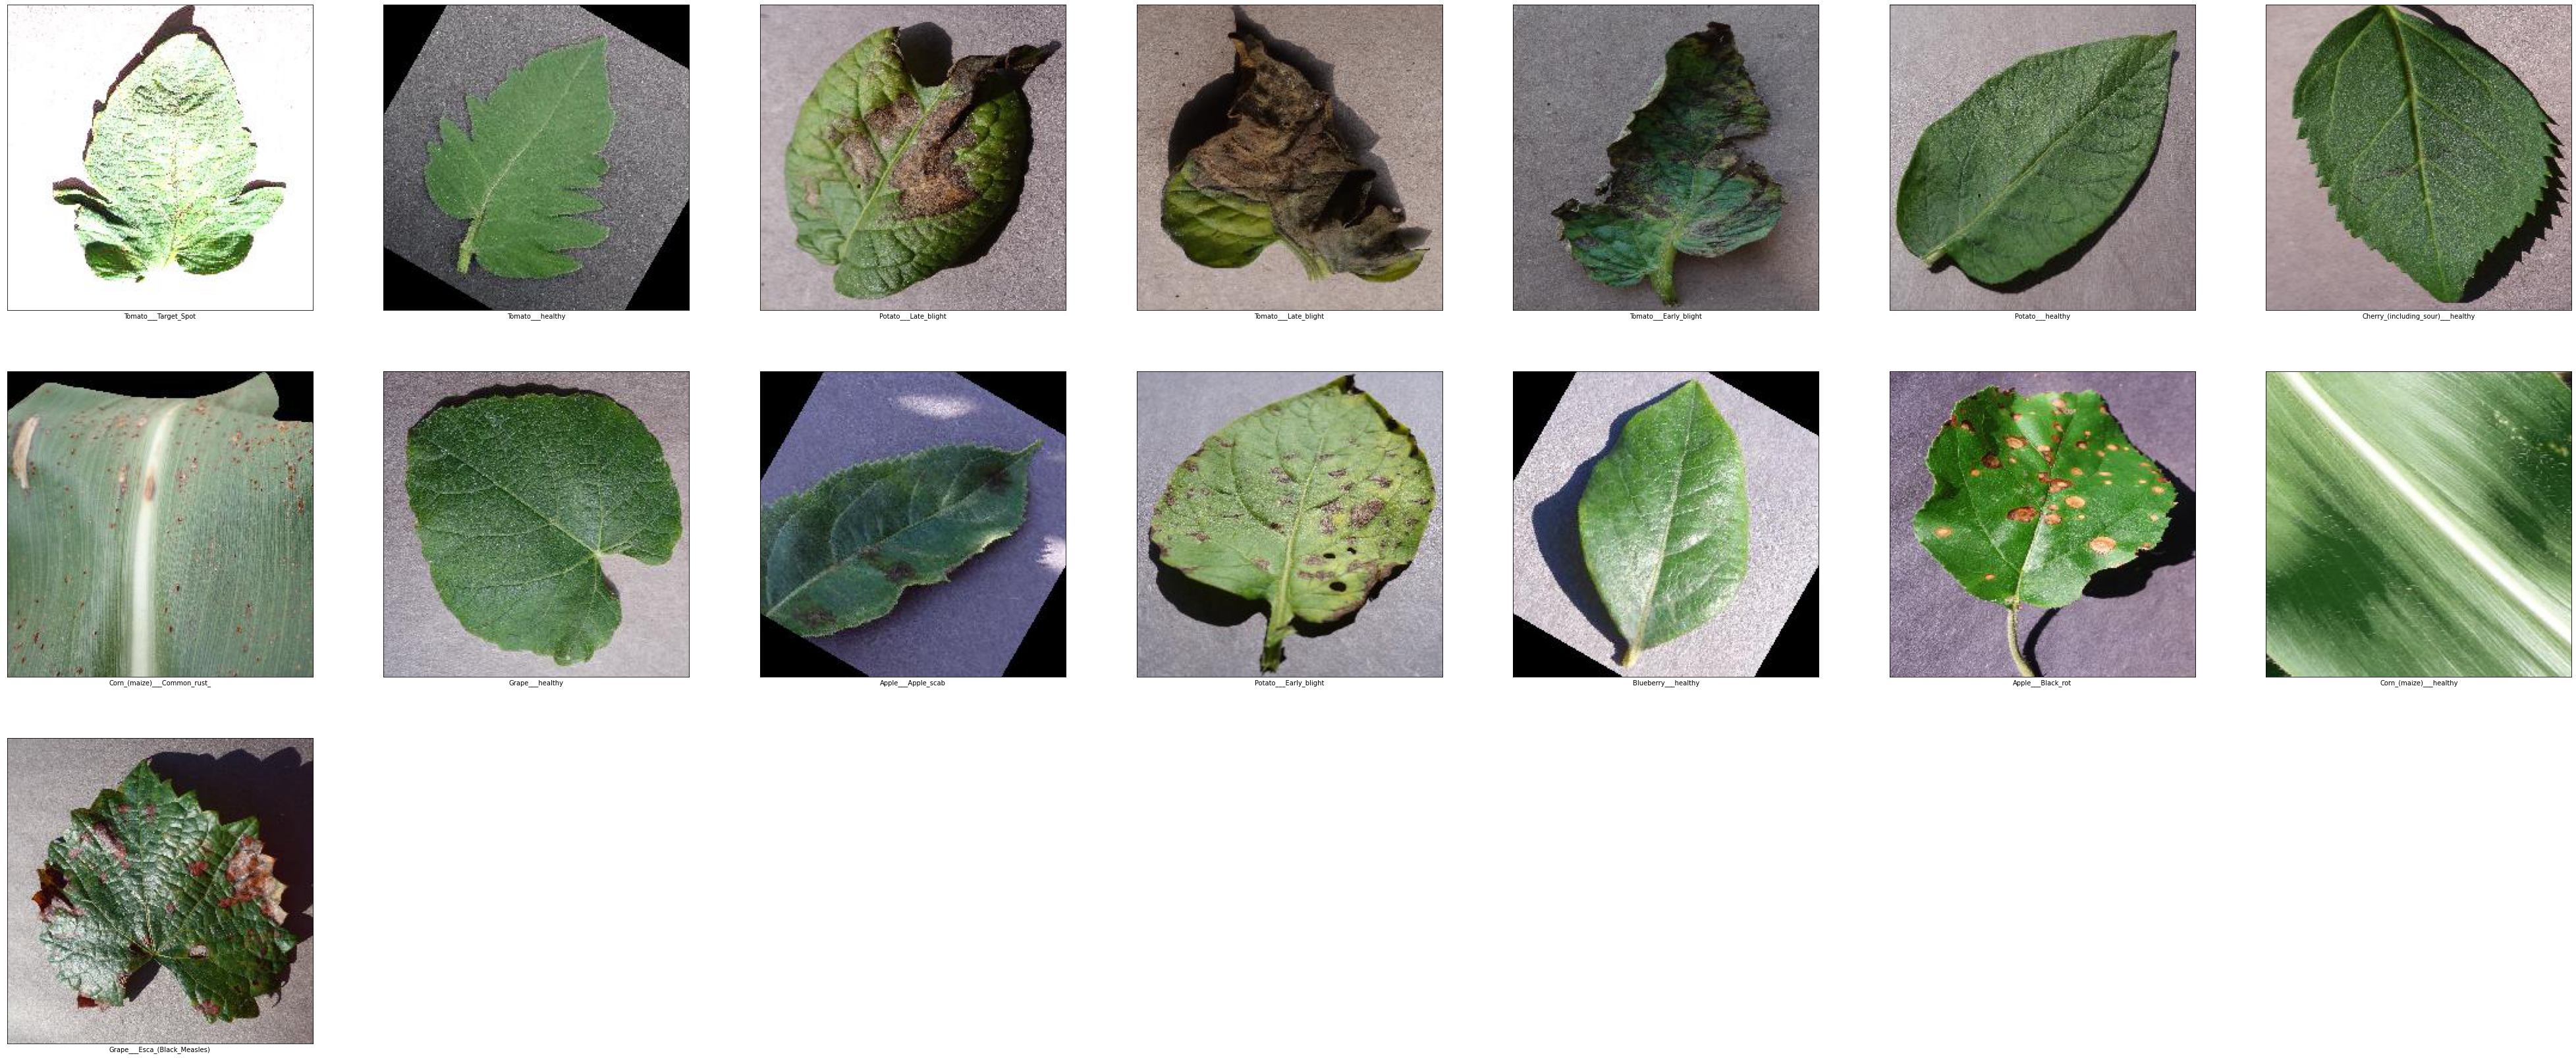

In [ ]:
path='/content/drive/MyDrive/missmatch/Plant disease dataset-FINAL VERSION/train'
plt.figure(figsize=(70,70))
count=0
plant_names=[]
total_images=0
for i in os.listdir(path):
  count+=1
  plant_names.append(i)
  plt.subplot(7,7,count)

  images_path=os.listdir(path+"/"+i)
  print("Number of images of "+i+":",len(images_path),"||",end=" ")
  total_images+=len(images_path)

  image_show=plt.imread(path+"/"+i+"/"+images_path[0])
  
  plt.imshow(image_show)
  plt.xlabel(i)
  
  plt.xticks([])
  plt.yticks([])


print("Total number of images we have",total_images)

87910968/87910968 [==============================] - 5s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 15)                30735     
                                                                 
Total params: 21,833,519
Trainable params: 21,799,087
Non-trainable params: 34,432
____________________________________________

Epoch 1/25
104/150 [===================>..........] - ETA: 16:02 - loss: 0.7916 - accuracy: 0.7521


Epoch 1: val_accuracy improved from -inf to 0.85912, saving model to plant_disease_detection_incept.h5
150/150 [==============================] - 2428s 16s/step - loss: 0.7916 - accuracy: 0.7521 - val_loss: 0.3751 - val_accuracy: 0.8591


12/12 [==============================] - 61s 5s/step - loss: 0.4103 - accuracy: 0.8702


[0.41026976704597473, 0.8701657652854919]

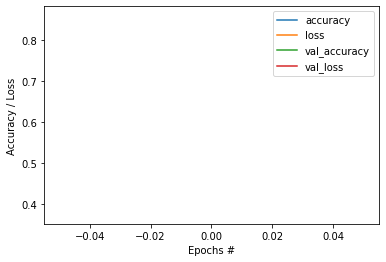

/content/plant_disease_detection_incept.h5

94765736/94765736 [==============================] - 4s 0us/step


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 15)                30735     
                                                                 
Total params: 23,618,447
Trainable params: 23,565,327
Non-trainable params: 53,120
__________________________________________